Objective of this task:

---

Predict the percentage of a student based on the number of study hours as per the information in the given dataset. 

In [1]:
import pandas as pd

import numpy as np

In [2]:
file_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'


In [3]:
data = pd.read_csv(file_url, sep = ',', header = 0)

In [4]:
# reading the file

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [6]:
# checking the number of unique values in first column 

len(data['Hours'].unique())

23

In [7]:
# checking the number of unique values in second column

len(data['Scores'].unique())

23

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The statistical summary of dataset above shows that data in each of the columns in the given dataset do not follow Gaussian distribution. 

In [10]:
# importing necessary packages for visualization of data 

import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


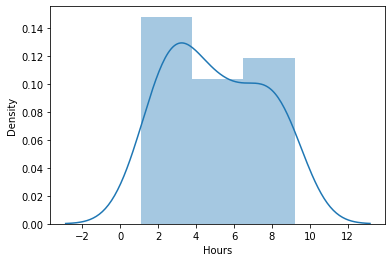

In [11]:
sns.distplot(data['Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


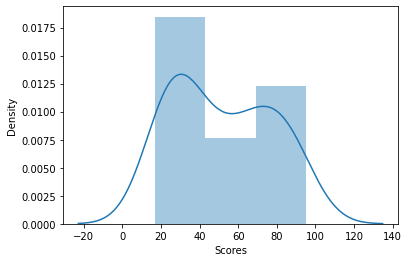

In [12]:
sns.distplot(data['Scores'])

Assumptions:

---

In this problem, we have to predict the percentage obtained by the student.However, the values in 'Scores' column fall in the range between 17 and 95. It can be assumed that total marks are 100 or score values themselves represent percentage out of the total 100 percent in this particular problem.  


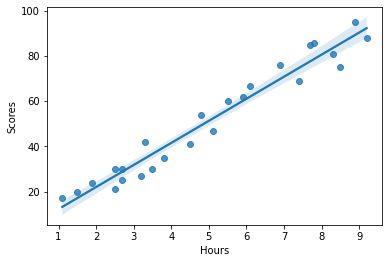

In [13]:
# making a regression plot to visualize and check the linear relation between feature and label in the dataframe as it is clear that in the given 
# problem, the objective is to predict score of a student based on the number of hours studied. So, 'Hours' is the feature
# and 'Scores' is the label. The label i.e.; 'Scores' will be plotted on the y-axis and feature i.e.; 'Hours' will be plotted on the x-axis.

sns.regplot(x = 'Hours', y = 'Scores', data = data)


Inference:

Above plot depicts a strong positive linear relation between the feature and the label. Hence, the visualisation of given data shows that it is not required to transform the given dataset before application of the linear regression algorithm for making predictions. 

In addition to the visualisation of linear relation using the regression plot, correlation coefficient can also be checked to quantify the strength of the linear relation. 

In [14]:
# checking the coorelation between feature and label in the given dataset

corr_data = data.corr()

In [15]:
corr_data

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Inference:

The above correlation matrix shows that there is a very high positive correlation between feature i.e.; 'Hours' and label i.e.; 'Scores' in the given dataset. The correlation value is around 0.98, which is very close to 1 and thus, it is very high and its positive value shows that as values in feature increase, the values in label are also increased and vice-versa. 

After checking the correlation, it is also required to take into consideration whether the values are required to be normalized as the feature and label in the given data do not follow Gaussian distribution. **It is one of the assumptions of the linear regression that the data should follow Gaussian distribution**. Hence, it is certain to carry out normalization of values before splitting the data into training and validation sets and apply linear regression algorithm. 



---

Normality of the feature and label can be further checked by using statistical procedures such as Shapiro Wilk test. 

In [16]:
# Checking whether the values in column follow normal distribution by using Shapiro test
# Null hypothesis is that the column data values follow normal distribution
# If p-value > 0.05, the data follows normal distribution
# If p-value <= 0.05 then the data does not follow normal distribution

from scipy import stats

# conducting Shapiro Wilk test on numerical variables in 'Hours' column of data to check whether the values
# follow Gaussian distribution.

shap_t, shap_p = stats.shapiro(data['Hours'])

print("Skewness : %f" % abs(data['Hours']).skew())
print("Kurtosis : %f" % abs(data['Hours']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness : 0.190338
Kurtosis : -1.302343
Shapiro_Test: 0.940138
Shapiro_Test: 0.149118


**Inference:**

The output of above code expression shows the result of Shapiro Wilk test. The output shows that the p-value is greater than 0.05 and this value indicates that the null hypothesis is correct or 'Hours' column in the given dataset follow Gaussian distribution. 

In [17]:
'''checking the normality of distribution of data in 'Scores' column by using Shapiro Wilk test'''

# conducting Shapiro Wilk test on numerical variables in 'Scores' column of data to check whether the values
# follow Gaussian distribution.

shap_t, shap_p = stats.shapiro(data['Hours'])

print("Skewness : %f" % abs(data['Scores']).skew())
print("Kurtosis : %f" % abs(data['Scores']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)


Skewness : 0.233965
Kurtosis : -1.443833
Shapiro_Test: 0.940138
Shapiro_Test: 0.149118


Inference:

The output of above code expression shows the result of Shapiro Wilk test. The output shows that the p-value is greater than 0.05 and this value indicates that the null hypothesis is correct or 'Scores' column in the given dataset follow Gaussian distribution.

In [18]:
# we will use OLS (ordinary least squares) method in this problem to study linear relationships between the feature
# and label

# However, it is also important to consider that the given dataset has only 25 observations. 
'''According to linear regression modelling strategies, the minimum number of observations for a linear regression model 
are 10-20 observations per variable.'''

# in this problem, there is one independent variable and one dependent variable. Hence, theoretically, the
# linear regression function will be Y = Bo + B1 x, where y is the predicted value of scores or dependent variable
# and Bo and B1 are coefficients. Bo is the intercept and B1 is the slope of the regression function plotted with 
# independent variable 'Hours' on the x-axis and dependent variable, 'Scores' on the y-axis. 

# calculating coefficients of linear regression function as coefficients determine the predicted values of scores along with observable values of hours

# defining a function to calculate the coefficients
def calculate_coef(data, x, y):
  # getting total number of observations in data
  total_os = data.shape[0]

  # getting the mean of values in each of the 'Hours' and 'Scores' columns respectively
  avg_hours = np.mean(x)
  avg_scores = np.mean(y)

  # calculating cross products of 'Hours' and 'Scores' columns 
  SS_xy = np.sum(x * y) - (total_os * avg_hours * avg_scores)
  # calculating sum of squares of values of independent variable, 'Scores'
  SS_xx = np.sum(x * x) - (total_os * avg_hours * avg_hours)

  # regression coefficient, B1 = (SS_xy / SS_xx)
  b_1 = SS_xy/SS_xx

  # calculating coefficient that is intercept or Bo. Bo = avg(Y)- B1 * avg(X)
  b_0 = avg_scores - (b_1 * avg_hours)

  # returning the linear regression coefficients
  return (b_0, b_1)


In [19]:
# using the above defined function

x = data['Hours'] # independent variable or feature
y = data['Scores'] # dependent variable or label

calculate_coef(data, x, y)

(2.483673405373196, 9.775803390787472)

The output of above code expression shows that the values of intercept Bo and regression coeffcient B1 are 2.48 and 9.8 respectively. However, the ordinary least squares method clearly states that the value of Bo and B1 for which the residual sum of squares or sum of squares of the difference between the predicted and actual values of the target variable i.e.; 'Scores' is minimum can be only considered for getting the regression line that is best fit to the observed data. 

In [20]:
# importing packages for building linear regression model 

from sklearn.linear_model import LinearRegression

# importing packages for metrics for evaluation of linear regression model 

from sklearn.metrics import mean_squared_error, r2_score

# since the number of observations is merely 25, the given dataset can only be split into training and test sets. There is not enough data to create
# a validation set that is often considered a good practice for building a good regression model. 

from sklearn.model_selection import train_test_split


In [21]:
# splitting the given dataset into training and test sets. The same split is ensured every time the below code is executed
# by splitting the dataset randomly by setting the value of random_state as 1.

X = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, -1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16,) (9,) (16,) (9,)


In [22]:
# reshaping the above variables into 2D arrays after splitting of data by using array.reshape() 

X_train = X_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)

y_test = y_test.reshape(-1, 1)

In [23]:
# building a linear regression model and making predictions

model = LinearRegression()

result_1 = model.fit(X_train, y_train)

predict_val = result_1.predict(X_test)

In [24]:
# checking mean squared error that is the sum of squares of differences between the predicted values and actual label values in y_test

mean_sq_error = mean_squared_error(y_test, predict_val)

In [25]:
mean_sq_error

50.03807060523169

The above value of mean squared error can be considered as the error for the baseline linear regression model. 

In [26]:
# checking the accuracy of the model

accuracy_model = result_1.score(X_test, y_test)

accuracy_model

0.9047140370739194

The output of above code expression shows that accuracy of the model is 90%. 

In [27]:
# computing r-squared value of above linear regression model. r-squared is a statistic that indicates the proportion of variability 
# in the model that is explained by the feature or independent variable. r-squared is the ratio of Regression sum of squares to total sum of squares

r2_score(y_test, predict_val)


0.9047140370739194

The output of above code expression shows that R-squared value is 0.9, which suggets that feature in the given dataset or 'Hours' explains 90% of the variation in the linear regression model.  

In [28]:
# checking the intercept of linear regression model 

result_1.intercept_

array([-0.80055983])

In [29]:
# checking the regression coefficient of linear regression model

result_1.coef_

array([[10.33097478]])

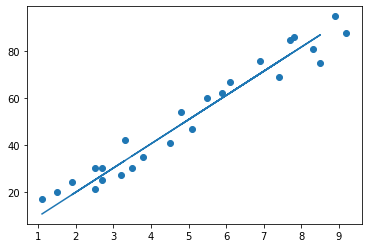

In [30]:
# plotting the values. The scattered data points represent actual data points. The line represents the regression line made by plotting
# test features against predicted values of label 

plt.scatter(X, y)
plt.plot(X_test, predict_val)
plt.show()

In [31]:
# the above linear regression model is a baseline model. We will now build a ordinary least squares linear regression model 
# such that the sum of squares of distances between observed data and predicted values is minimum and compare this model with the above baseline 
# linear regression model to monitor any improvements in terms of lower mean squared errors, R-squared values, accuracy, and value of intercept (Bo) 
# and value of regression coefficient (B1)

# importing necessary packages for OLS (ordinary least squares) linear regression 

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
# splitting given dataset into training and test sets

feature_X = np.array(data.iloc[:, 0])

label_y = np.array(data.iloc[:, -1])

In [33]:
feat_train, feat_test, label_train, label_test = train_test_split(feature_X, label_y, test_size = 0.33, random_state= 1)

print(feat_train.shape, feat_test.shape, label_train.shape, label_test.shape)

(16,) (9,) (16,) (9,)


In [34]:
# changing 1D array to 2D array after splitting the data

feat_train = feat_train.reshape(-1, 1)

feat_test = feat_test.reshape(-1, 1)

label_train = label_train.reshape(-1, 1)

label_test = label_test.reshape(-1, 1)

In [35]:
# building a linear regression model using OLS linear regression method and making predictions

feat_train2 = sm.add_constant(feat_train)
model_ols = sm.OLS(label_train, feat_train2)
results1 = model_ols.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     443.2
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           5.36e-12
Time:                        09:14:55   Log-Likelihood:                -46.797
No. Observations:                  16   AIC:                             97.59
Df Residuals:                      14   BIC:                             99.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8006      2.761     -0.290      0.7

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [36]:
# Model prediction

label_test = sm.add_constant(label_test)
feat_test = sm.add_constant(feat_test)
pred_val_ols = results1.predict(feat_test)
pred_val_ols = sm.add_constant(pred_val_ols)
# checking mean squared error

mean_sq_error1 = mean_squared_error(label_test, pred_val_ols)

# Predicting the model over train data for diagnostics

case_pred_val = results1.predict(feat_train2)

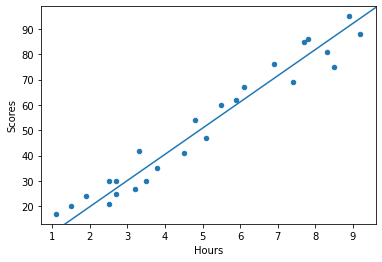

In [43]:
''' plotting OLS linear regression results '''

# importing necessary package
from statsmodels.graphics.regressionplots import abline_plot

# scatterplot data
ax = data.plot(x = 'Hours', y = 'Scores', kind = 'scatter')
# plotting regression line
abline_plot(model_results = results1, ax = ax)
plt.show()


The above plot shows that the regression line is very close to the observed data points, which are visible in scatterplot. 

In [37]:
# checking the value of mean squared error
mean_sq_error1

25.019035302615848

The output of above code expression shows that the mean squared error of OLS linear regression model is 25, which is significantly lower than that of previous linear regression model for which the mean squared error is around 50. Thus, this OLS regression model is better than previous linear regression model. 

In [38]:
# checking the regression coefficients of OLS regression model 

results1.params

array([-0.80055983, 10.33097478])

The output of above code expression gives two values - the first value corresponds to the intercept of the linear regression function and second value corresponds to the regression coefficient of the linear regression function. 

In [39]:
# checking the R-squared value of OLS linear regression model

results1.rsquared

0.9693800724956538

The R-squared value of OLS linear regression model is approximately 97%, which is more than R-squared value of previous linear regression model. Greater the value of R-squared, the better fitted is the model. Hence, the OLS model is better than the previous linear regression model. 

In [40]:
# In the given problem, it is asked to predict the score if a student studies 9.25 hours a day. 
# We can calculate the score by using the values obtained from substituting the values of intercept 
# and regression coefficient in the OLS linear regression model in the equation, Y = Bo + B1X

pred_score = -0.80055983 + (10.33097478 * 9.25)

print(" The student is likely to score {} if he or she studies 9.25 hours a day".format(pred_score))

 The student is likely to score 94.760956885 if he or she studies 9.25 hours a day


The output of above code expression shows that the student is likely to get a score of approximately 94.76 based on the linear regression model built using the given data of students' study hours and their respective scores. 

**End of the data analysis**